<a id='abstract'></a>
# Amazon Customer Reviews Milestone Report
-------

## Abstract

In our analysis we were able to look at:
- the distribution of ratings among products and customers.
- determine the most popular products and categories.
- look at the highest rated categories and see what affects rating averages.
- observe how ratings change over time.
- determine the point where the Amazon marketplace exploded in growth.

We have found that:
- over 60% of all reviews receive 5 star ratings.
- most products have between 100 and 1,000 reviews.
- most customers give between 1 and 10 reviews.
- out of 11,500+ products, less than 250 have an average rating under 3.0.
- 90% of the Amazon marketplace revolves around books, music, movies and mobile apps.
- the top 3 categories have intangible products (digital).
- the range in the difference of average categorical ratings is 0.84, from 3.84 to 4.68.
- over time the average annual ratings stay between 4.1 and 4.4.
- the marketplace has grown exponentially since 2011.
- average product ratings are mostly affected by 5, 4 and 1 star reviews.
- most reviews occur in January and December, likely because of the holidays.

-----

As we analyzed these features, we have seen many patterns as they relate to customer reviews.  The next step is to use what we have found to begin creating a recommendation engine.

<a id='Table of Contents'></a>

-----
## Table of Contents 

### <a href='#abstract'>Abstract</a>

### <a href='#intro'>Introduction</a>

----

### <a href='#wrangle'>Data Wrangling</a>

----

- <a href='#read'>Read in Data</a>

- <a href='#standardize'>Standardize Columns & Product Categories</a>

- <a href='#drop'>Drop Products With Under 100 Reviews</a>

- <a href='#ppp'>Product Parent vs. Product Title vs. Product ID</a>

- <a href='#missing'>Drop Rows with Missing Data</a>

- <a href='#date'>Handle DateTime Objects</a>

----

### <a href='#eda'>Exploratory Data Analysis</a>

----

- <a href='#distribution'>Distribution of Ratings Among Products and Customers</a>

- <a href='#popular'>Most Popular Products and Categories</a>

- <a href='#ratings'>Ratings Among Product Categories</a>

- <a href='#year'>Ratings by Year</a>

- <a href='#month'>Ratings by Month</a>

- <a href='#time'>Ratings Over Time</a>

----

### <a href='#conclusion'>Conclusion</a>

<a id='intro'></a>

-----  

## Introduction
Amazon is a multinational technology company based in Seattle, Washington, that focuses on e-commerce, cloud computing, digital streaming, artificial intelligence and more.  One of its most popular services is the e-commerce website ‘Amazon.com.’  The website offers a plethora of different types of products ranging from automotive to sports to groceries to hardware tools to digital products and more.  A shopper can purchase almost anything on Amazon.com.  

One of the ways Amazon keeps its shoppers engaged is by way of its product recommendation system.  The product recommendation system uses content and collaborative based filtering, looking at a shopper’s past purchases and purchases by shoppers who purchased similar items and then recommends items that the shopper may like based off of these two behaviors.  Collaborative filtering enables the shopper to see items from other categories, while content based filtering allows shoppers to see domain specific items. 


### Problem Statement:

“If you know my previous habits, you’re assuming I’m going to stay that way for the rest of my life.  You’re trying to channel me into buying a product.  I want to experience this world by stepping where I’ve never stepped before and buying something I never thought of buying.” 

    - Neil Degrasse Tyson

Recommendation systems are great at recommending similar products to shoppers, but they tend to be too concentrated, which does not let a shopper go outside their comfort zone or see something they may not have known they wanted.  For example, watching a video on Youtube will start to flood a user’s browser with several similar videos and not enough diversity in content.  As for the case with Amazon, we want to build a recommendation system that recommends a diverse selection of items or content to users as needed.

<a id='wrangle'></a>

## Data Wrangling

The Amazon Customer Reviews dataset is downloaded as a tsv file and can be found [here](https://s3.amazonaws.com/amazon-reviews-pds/tsv/index.txt) while the readme can be found [here](https://s3.amazonaws.com/amazon-reviews-pds/readme.html).  

The Amazon Customer Reviews Dataset is a robust set of TSV files that house over a hundred million reviews that express opinions and experiences of shoppers regarding products on the Amazon.com website.  This makes Amazon Customer Reviews a rich source of information for Natural Language Processing (NLP), Information Retrieval (IR) and Machine Learning (ML).  Reviews range from 1995 to 2015 and are compiled from customers in 5 countries.
	
The dataset contains 6.9 million+ reviews on a 5-star rating scale from 4 million+ different customers.  There are 86,000+ products in 16,000+ product parents ranging in 39 different categories from August 8th, 1995 to August 31, 2015.  Some of the categories are mobile apps, digital ebooks, home entertainment, video games, home improvement, automotive, software, beauty and much much more.

<a href='#Table of Contents'>Table of Contents</a>

<a id='read'></a>
### Read in Data

<a href='#Table of Contents'>Table of Contents</a>

In [1]:
# Import libraries and read in datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import warnings

plt.style.use('seaborn')
warnings.filterwarnings('ignore')

apr = pd.read_csv('APR_data/amazon_reviews_multilingual_US_v1_00.tsv', 
                       sep='\t', error_bad_lines=False, warn_bad_lines=False)

<a id='standardize'></a>
### Standardize Columns & Product Categories

<a href='#Table of Contents'>Table of Contents</a>

In [2]:
# Find out how many downvotes each review received
apr['downvotes'] = apr.total_votes - apr.helpful_votes

# Reorder columns
columns = ['marketplace', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'product_category', 'star_rating',
       'helpful_votes', 'downvotes', 'total_votes', 'vine', 'verified_purchase',
       'review_headline', 'review_body', 'review_date']

apr = apr[columns]

# Standardized product category names
apr.product_category.replace({
        'Digital_Music_Purchase': 'Digital Music Purchase',
        'Digital_Ebook_Purchase': 'Digital eBook Purchase',
        'Digital_Video_Download': 'Digital Video Download',
        'Lawn and Garden': 'Lawn & Garden',
        'Mobile_Electronics': 'Mobile Electronics',
        'Personal_Care_Appliances': 'Personal Care Appliances',
        'Mobile_Apps': 'Mobile Apps'
    }, inplace=True)

<a id='drop'></a>
### Drop Products With Under 100 Reviews
We want to make an accurate recommendation system and most of the products featured in the dataset have very little purchases. We wanted to used products that had a reasonable amount of purchases but still keep the dataset as intact as possible. With products with at least 100 purchases, we were able to hold on to 85% of our dataset.
Even though we lost roughly 75,000 unique products, most of them were single purchases of the same item with different product ids. This would cause much unneeded noise in our analysis and modeling phases.

<a href='#Table of Contents'>Table of Contents</a>

In [3]:
# Many lost unique product ids were actually small variations of the same product
apr.groupby('product_parent')['product_title'].value_counts()[12:20]

product_parent  product_title                                                        
896923          For Whom The Bell Tolls                                                  8
                FOR WHOM THE BELL TOLLS                                                  5
                For Whom the Bell Tolls (War Promo)                                      2
                FOR WHOM THE BELL TOLLS ~1940 BOOK CLUB EDITION                          1
                For Whom The Bell Tolls (Turtleback School & Library Binding Edition)    1
                For Whom the Bell Tolls (Illustrated)                                    1
                For Whom the Bell Tolls (Scribner Classic)                               1
                For Whom the Bell Tolls (The Scribner Library)                           1
Name: product_title, dtype: int64

In [4]:
# Extract counts on how many customers purchased a unique product
purchased_counts = apr.product_id.value_counts().rename('purchased_counts')

# Add column containing product purchased counts
apr = apr.merge(purchased_counts.to_frame(),
                left_on='product_id',
                right_index=True)

# Filter only products with 100 or more purchases
apr = apr[apr.purchased_counts >= 100]

<a id='ppp'></a>
### Product Parent vs. Product Title vs. Product ID
It is important to know that for most products: 
- the product id is a unique item in a unique category and unique name
- the product title can be the same for 2 different product ids because they pertain to more than one category (cd, dvd, digital music)
- the product parent houses the many variations of a product (name, category, format)

For example, product parent 896923 has two different unique products which are the same product, "For Whom the Bell Toll," but one is an ebook and the other is a physical book.

Because of this we initially were going to make a recommendation system using the product parent.

In [5]:
print(apr.groupby('product_parent')['product_id'].value_counts()[1:3])
print('\n')
print(apr.groupby('product_parent')['product_title'].value_counts()[1:3])
print('\n')
print(apr.groupby('product_parent')['product_category'].value_counts()[1:3])

product_parent  product_id
896923          0684803356    329
                B000FC0OOU    211
Name: product_id, dtype: int64


product_parent  product_title                              
896923          For Whom the Bell Tolls                        329
                For Whom the Bell Tolls (Scribner Classics)    211
Name: product_title, dtype: int64


product_parent  product_category      
896923          Books                     329
                Digital eBook Purchase    211
Name: product_category, dtype: int64


Upon further analysis we found that we will have to be careful with the idea because many products that have the same name are different editions of each other. Some are movies, while others are games or songs. Some are part 1 of a movie, while others are sequels are prequels. Also, some product parents house many different popular unique items as seen below. We may work on a hierarchy from product parent to product id in order to better assess the differences and similarities of the products.

<a href='#Table of Contents'>Table of Contents</a>

In [6]:
example = apr[apr.product_parent == 382448153]
example.groupby('product_parent')['product_title'].value_counts()

product_parent  product_title                                                   
382448153       The Girl Who Kicked the Hornet's Nest (Millennium Series Book 3)    1804
                The Girl Who Played with Fire (Millennium Series Book 2)            1569
                The Girl Who Kicked the Hornet's Nest (Millennium Trilogy)          1093
                The Girl Who Played with Fire (Millennium Series)                   1091
                The Girl Who Played with Fire (Millennium )                          455
                The Girl Who Kicked the Hornet's Nest                                304
                The Girl Who Kicked the Hornets' Nest (Millennium Series Book 3)     199
                The Girl Who Kicked the Hornet's Nest (Millennium Series)            168
                The Girl Who Played With Fire (Millennium Series)                    152
Name: product_title, dtype: int64

<a id='missing'></a>
### Drop Rows with Missing Data

<a href='#Table of Contents'>Table of Contents</a>

In [7]:
apr.dropna(axis=0, inplace=True)

# Reset index and drop unimportant columns
apr = apr.reset_index().drop(['index', 'marketplace', 'vine'], axis=1)

def missing(dataset):
    columns = dataset.columns
    print('MISSING ROWS per COLUMN')
    for column in columns:
        percentage = (dataset[column].isnull().sum() / len(dataset)) * 100
        print('{}: {}, {:0.2f}%'.format(column, dataset[column].isnull().sum(), percentage))
        
missing(apr)

MISSING ROWS per COLUMN
customer_id: 0, 0.00%
review_id: 0, 0.00%
product_id: 0, 0.00%
product_parent: 0, 0.00%
product_title: 0, 0.00%
product_category: 0, 0.00%
star_rating: 0, 0.00%
helpful_votes: 0, 0.00%
downvotes: 0, 0.00%
total_votes: 0, 0.00%
verified_purchase: 0, 0.00%
review_headline: 0, 0.00%
review_body: 0, 0.00%
review_date: 0, 0.00%
purchased_counts: 0, 0.00%


<a id='date'></a>
### Handle DateTime Objects

<a href='#Table of Contents'>Table of Contents</a>

In [8]:
# Split review dates by year, month and day (strings)
time_split = apr.review_date.str.split('-', n=2, expand=True)
apr['year'] = time_split[0]
apr['month'] = time_split[1]
apr['day'] = time_split[2]

# Convert review dates into a datetime object
dates = apr.review_date
apr.review_date = [d.date() for d in pd.to_datetime(dates)]

# Extract month and year from review dates
apr['month_year'] = pd.to_datetime(apr['review_date']).dt.to_period('M')

**DATA COLUMNS:**
- **customer_id**       - Random identifier that can be used to aggregate reviews written by a single author.
- **review_id**         - The unique ID of the review.
- **product_id**        - The unique Product ID the review pertains to.
- **product_parent**    - Random identifier that can be used to aggregate reviews for the same product.
- **product_title**     - Title of the product.
- **product_category**  - Broad product category that can be used to group reviews (also used to group the dataset into coherent parts).
- **star_rating**       - The 1-5 star rating of the review.
- **review_headline**   - The title of the review.
- **review_body**       - The review text.
- **review_date**       - The date the review was written.
- **purchased_count**   - Amount of purchases the product received (by product id). **(ADDED)**
- **year**              - The year the review was written. **(ADDED)**
- **month**             - The month the review was written. **(ADDED)**
- **month_year**        - The month and year the review was written. **(ADDED)**



------
<a id='eda'></a>
## Exploratory Data Analysis

<a href='#Table of Contents'>Table of Contents</a>
<a id='distribution'></a>

### Distribution of Ratings Among Products and Customers

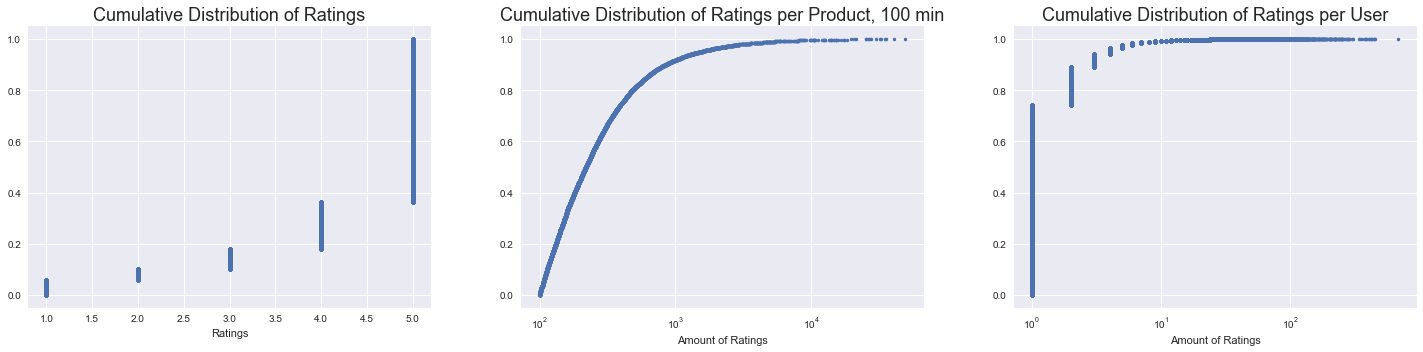

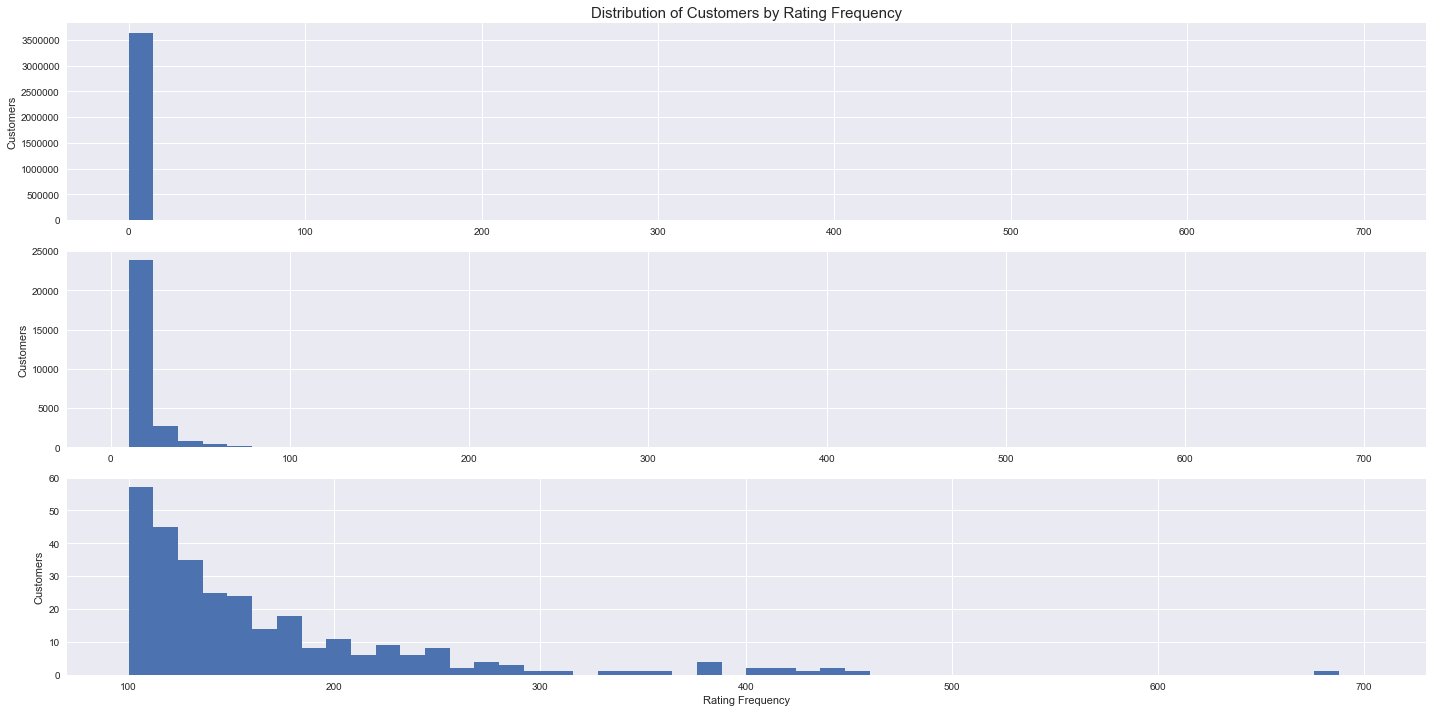

In [9]:
# Empirical cumulative distribution functions
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

plt.figure(figsize=(20,5))

# Plot cumulative distribution of ratings
x, y = ecdf(apr.star_rating)

ax1 = plt.subplot(1,3,1)
ax1.set_xlabel('Ratings')
ax1.set_title('Cumulative Distribution of Ratings', fontsize=18)
plt.plot(x, y, marker='.', linestyle='none')


# Plot cumulative distribution of ratings per product, 100 minimum
x, y = ecdf(apr.groupby('product_id').star_rating.count())

ax2 = plt.subplot(1,3,2)
ax2.set_xlabel('Amount of Ratings')
ax2.plot(x, y, marker='.', linestyle='none')
ax2.set_xscale('log');
ax2.set_title('Cumulative Distribution of Ratings per Product, 100 min', fontsize=18)


# Plot cumulative distribution of ratings per user
x, y = ecdf(apr.groupby('customer_id').star_rating.count())

ax3 = plt.subplot(1,3,3)
ax3.set_xlabel('Amount of Ratings')
ax3.plot(x, y, marker='.', linestyle='none')
ax3.set_xscale('log');
ax3.set_title('Cumulative Distribution of Ratings per User', fontsize=18)

sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

# Plot distribution of amount of ratings per user
plt.figure(figsize=(20,10))

ax1 = plt.subplot(3,1,1)
ax2 = plt.subplot(3,1,2)
ax3 = plt.subplot(3,1,3)

apr.customer_id.value_counts().plot(kind='hist', bins=50, range=(0,700), ax=ax1)
apr.customer_id.value_counts().plot(kind='hist', bins=50, range=(10,700), ax=ax2)
apr.customer_id.value_counts().plot(kind='hist', bins=50, range=(100,700), ax=ax3)

ax1.set_title('Distribution of Customers by Rating Frequency', fontsize=15)
ax1.set_ylabel('Customers')
ax2.set_ylabel('Customers')
ax3.set_ylabel('Customers')
ax3.set_xlabel('Rating Frequency')

sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

##### Cumulative Distribution of Ratings
Over 60% of ratings receive 5 stars, while 1 star ratings occur less than 10% of the time.  Ratings between 2 and 4 stars occur roughly 30% of the time.  This means positive ratings occur over 80% of the time, while negative ratings occur roughly 15% of the time and neutral ratings occur 5% of the time.

##### Cumulative Distribution of Ratings per Product, 100 min
The cumulative distribution of products begins with 100.  60% of all products have between 100 and 500 reviews, while roughly 90% of products have up to 1,000 reviews.  Rouhgly 10% of products have between 1,000 and 10,000 reviews and some have over 10,000 reviews.

##### Distribution of Ratings per User
Roughly 75% of all customers have only reviewed products one time, while roughly 24% have reviewed up to 10 products.  There is a small percentage that have reviewed between 10 and 100 products and an even smaller percantage that have reviewed over 100 products.

Over 3.5 million customers have given between 1 and 10 reviews on products, while roughly 30,000 have given between 10 and 100 reviews on products. Roughly 300 customers have reviewed between 100 and 500 reviews. and less than 1 customer has reviewed almost 700 products.

<a id='popular'></a>

### Most Popular Products and Categories
<a href='#Table of Contents'>Table of Contents</a>

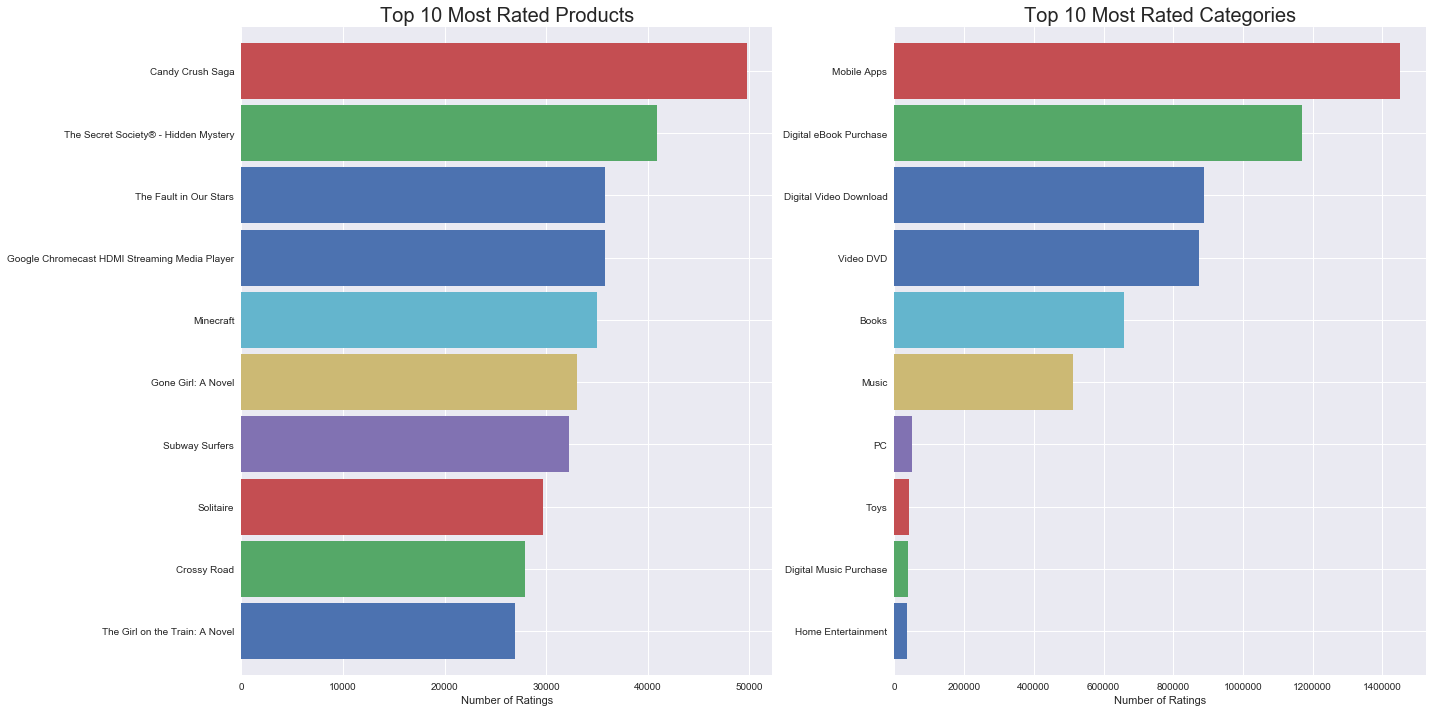

In [10]:
plt.figure(figsize=(20,10))

# Plot 10 most common products purchased
ax1 = plt.subplot(1,2,1)
apr.product_title.value_counts()[:10].sort_values().plot(kind='barh', width=0.9, ax=ax1)
ax1.set_xlabel('Number of Ratings')
ax1.set_title('Top 10 Most Rated Products', fontsize=20)

# Plot 10 most common categories purchased
ax2 = plt.subplot(1,2,2)
apr.product_category.value_counts()[:10].sort_values().plot(kind='barh', width=0.9, ax=ax2)
ax2.set_xlabel('Number of Ratings')
ax2.set_title('Top 10 Most Rated Categories', fontsize=20)

sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

Candy Crush is the most popular product reviewed on Amazon which is a mobile app.  Other items in the top 10 include the Google Chromecast which is a streaming device and Gone Girl which is a novel.  Every product in the top 10 has over 25,000 reviews with Candy Crush and The Secret Mystery having over 40,000 reviews.

Mobile apps is the most popular category reviewed on Amazon, followed by books, movies and music.  6 of the top 10 categories dominate the marketplace with well over 90% of total ratings and reviews.  The top 3 categories are all intangibles, not having any physical attributes.

<a id='ratings'></a>

### Ratings Among Product Categories
<a href='#Table of Contents'>Table of Contents</a>

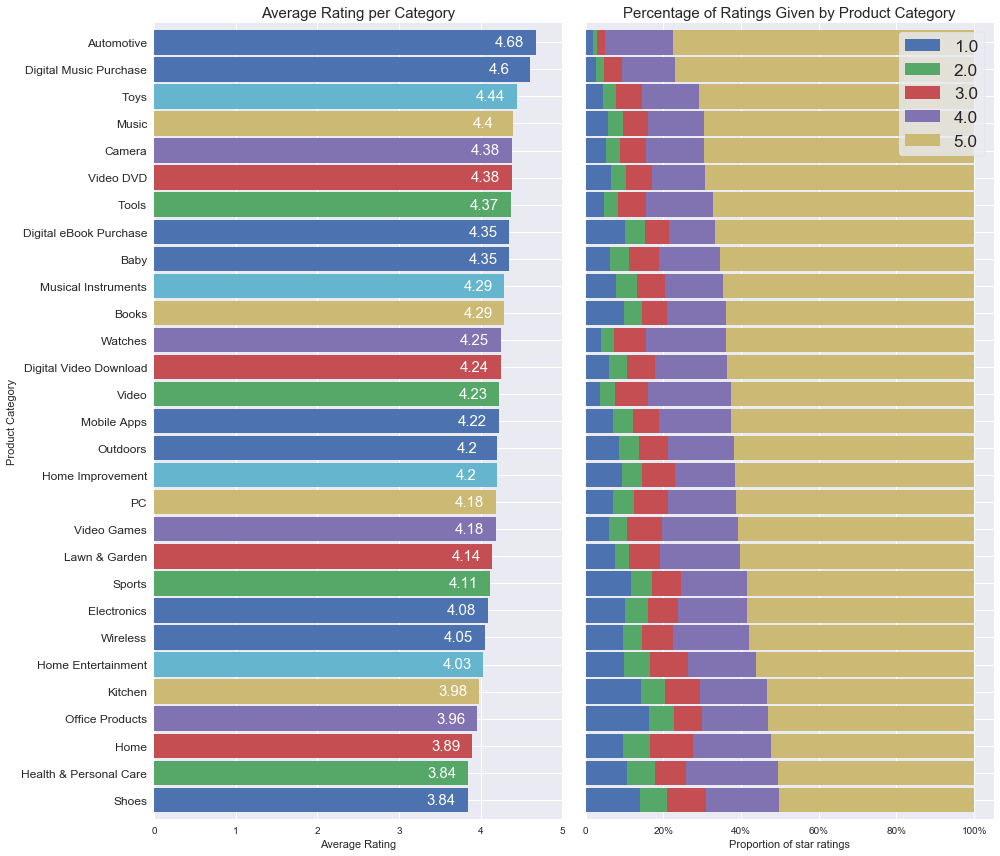

In [11]:
plt.figure(figsize=(14,12))

# Plot average rating by product category
ax = plt.subplot(1,2,1)
apr.groupby('product_category').star_rating.mean().sort_values().plot.barh(width=0.9, ax=ax)
ax.set_title('Average Rating per Category', fontsize=15)
ax.set_xlim(0, 5)
ax.set_ylabel('Product Category')
ax.set_xlabel('Average Rating')

plt.yticks(fontsize=12)
sns.despine(top=True, right=True)

# Create a list to collect the plt.patches data
totals = []

# Find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# Set individual bar lables using above list
total = sum(totals)

# Set individual bar lables using above list
for i in ax.patches:
    # Get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()-0.5, i.get_y()+.3, \
            str(round((i.get_width()), 2)), fontsize=15,
color='white')


# Group dataset by product category and star ratings and count amount of ratings for each
grouped = apr.groupby(['product_category', 'star_rating']).count().reset_index()

# Pivot dataset to display how many of each rating a product category received
g_pivot = grouped.pivot(index='product_category', columns='star_rating', values='customer_id')

# Plot breakdown percentage of ratings given by product category
ax2 = plt.subplot(1,2,2)
g_pivot.loc[:,1.0:5.0].div(g_pivot.sum(axis=1), axis=0).sort_values(by=5.0).plot.barh(stacked=True, width=0.9, ax=ax2)
ax2.set_title('Percentage of Ratings Given by Product Category', fontsize=15)
ax2.set_xticklabels(['0', '20%', '40%', '60%', '80%', '100%'])
ax2.set_yticklabels(' ')
ax2.set_ylabel('')
ax2.set_xlabel('Proportion of star ratings')
ax2.legend(loc=0, fontsize='xx-large', frameon=True)

sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

On average, the automotive category has the highest rated products (4.68), followed by digital music purchase (4.60) and toys (4.44). The lowest rated category is shoes (3.84), followed by health & personal care (3.84) and home (3.89). The range in average ratings from highest to lowest is 0.84.

The categories rated low seem to be categories where customers don't know what they may be receiving, variability of quality among the same type of products, while the categories rated highly seem to have less variability in what one can receive.

As stated earlier, music, books, movies and mobile apps dominate the Amazon marketplace.  The biggest factor that seems to determine a product category's average rating is how many 5 stars, 4 stars and 1 stars that category receives.  2 stars and 3 stars appears to remain close to the same proportion throughout each category.

<a id='year'></a>

### Ratings by Year
<a href='#Table of Contents'>Table of Contents</a>

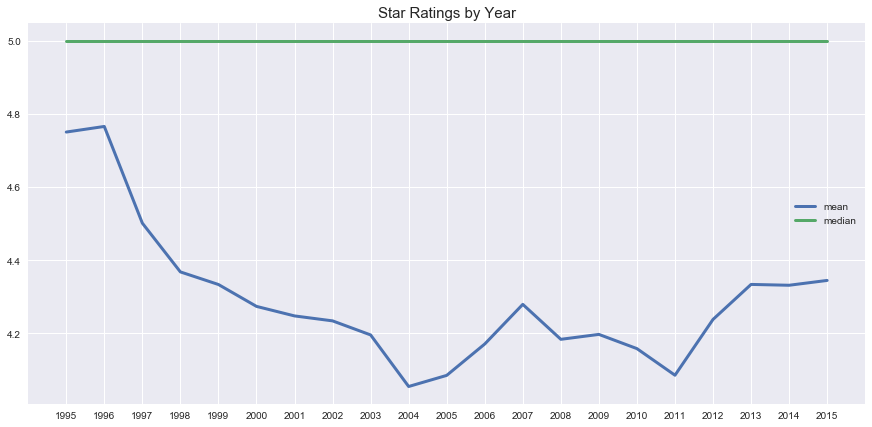

Last recorded rating was on 2015-08-31


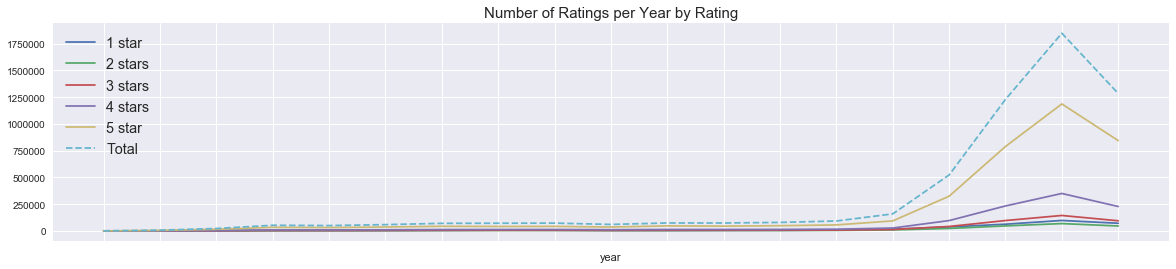

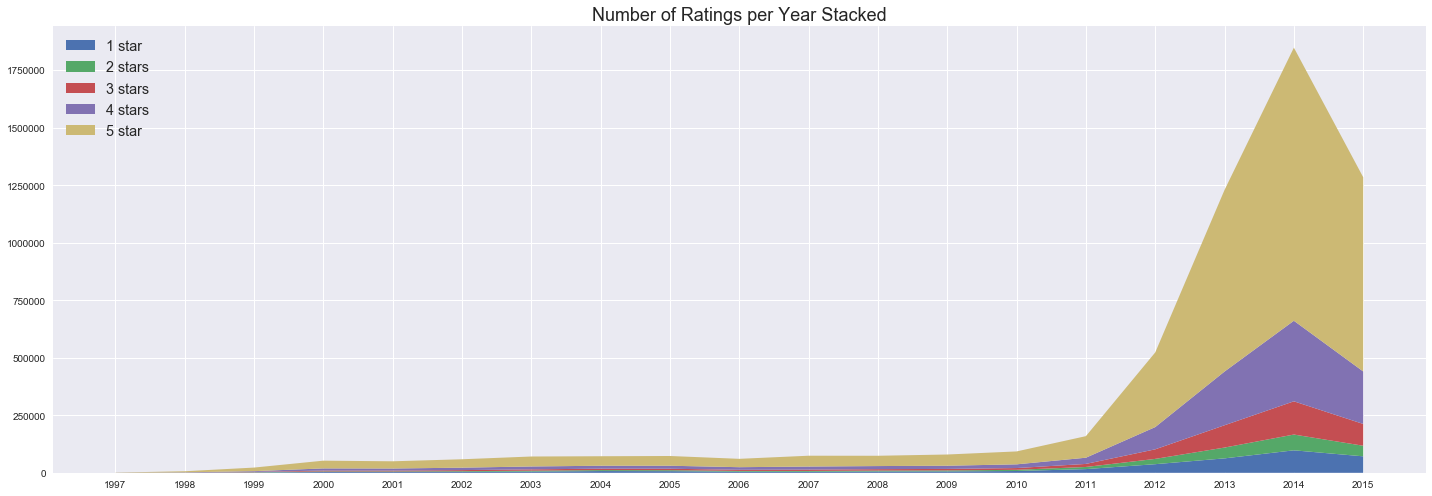

In [12]:
plt.figure(figsize=(15,7))
# Plot average star ratings by year
plt.plot('year', 'star_rating', data=apr.groupby('year').mean().reset_index().sort_values('year'), linewidth=3)

# Plot median star ratings by year
plt.plot('year', 'star_rating', data=apr.groupby('year').median().reset_index().sort_values('year'), linewidth=3)

plt.legend(['mean', 'median'], loc='right')
plt.title('Star Ratings by Year', fontsize = 15)
sns.despine(top=True, right=True)
plt.show()

plt.figure(figsize=(20,4))

# Find last rating date
print('Last recorded rating was on {}'.format(apr.review_date.tail(1).iloc[0]))

# Make sure all ratings have the same time frame
time = ['1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015']

# Separate ratings
one = apr[apr.star_rating == 1.0]
two = apr[apr.star_rating == 2.0]
three = apr[apr.star_rating == 3.0]
four = apr[apr.star_rating == 4.0]
five = apr[apr.star_rating == 5.0]

# Plot number of ratings per year per rating
one.groupby('year').count().star_rating[1:].plot()
two.groupby('year').count().star_rating[1:].plot()
three.groupby('year').count().star_rating.plot()
four.groupby('year').count().star_rating[2:].plot()
five.groupby('year').count().star_rating[2:].plot()

# Plot number of ratings per year
plt.plot(apr.groupby('year').count().star_rating[2:], linestyle='--')
plt.title('Number of Ratings per Year by Rating', fontsize=15)

plt.legend(['1 star', '2 stars', '3 stars', '4 stars', '5 star', 'Total'], loc='upper left', fontsize='x-large')
sns.despine(top=True, right=True)
plt.show()

# Plot number of ratings per year per rating
plt.figure(figsize=(20,7))
plt.stackplot(time,  
              one.groupby('year').count().star_rating[1:], 
              two.groupby('year').count().star_rating[1:], 
              three.groupby('year').count().star_rating, 
              four.groupby('year').count().star_rating[2:], 
              five.groupby('year').count().star_rating[2:])
plt.title('Number of Ratings per Year Stacked', fontsize=18)

plt.legend(['1 star', '2 stars', '3 stars', '4 stars', '5 star'], loc='upper left', fontsize='x-large')
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

Previously, we have discovered that products mostly recieve 5 star ratings so it is not a surprise that the median is 5 stars. We can see that when amazon first introduced product reviews, there has been a drop and balance of average reviews on an annual basis. Initially the average product reviews were just under 4.8 and dropped to roughly 4.1 in 2004. Over time, the average annual product review has stayed between 4.1 and 4.4.

As seen above, the Amazon marketplace started gaining popularity in 2010 and exploded exponentially from 2011 onwards. Not only did the marketplace explode, it exploded with quality products as we can see higher rated reviews are steeper in the growth than lower rated reviews. Although there seems to be a steep drop off from 2014 to 2015, it is worth noting that the last review available on this dataset was on August 31, 2015 so there are missing reviews for one third of the year for 2015.

<a id='month'></a>

### Ratings by Month
<a href='#Table of Contents'>Table of Contents</a>

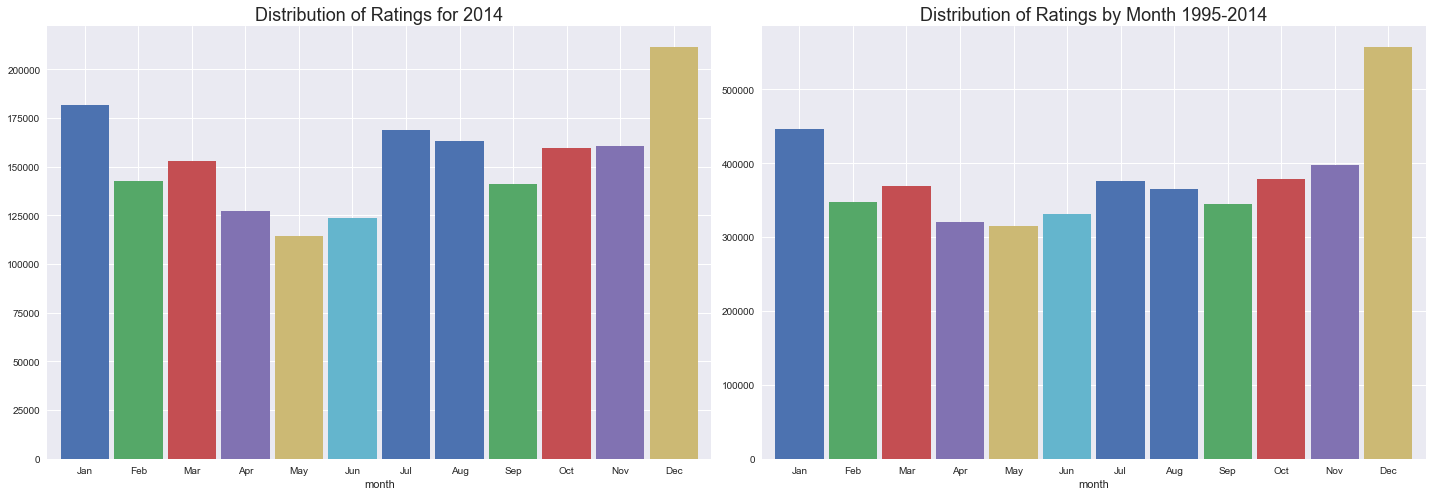

In [13]:
plt.figure(figsize=(20,7))

# Prepare xtick labels for months
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot distribution of ratings for 2014
m = apr.groupby(['year','month']).count().reset_index()
ax1 = plt.subplot(1,2,1)
m[m.year == '2014'].set_index('month').star_rating.plot(kind='bar', width=0.9, ax=ax1)
ax1.set_xticklabels(months)
ax1.set_title('Distribution of Ratings for 2014', fontsize=18)
plt.xticks(rotation=0)

# Plot distribution of ratings per month
ax2 = plt.subplot(1,2,2)
apr[apr.year != '2015'].groupby('month').count().customer_id.plot(kind='bar', width=0.9, ax=ax2)
ax2.set_xticklabels(months)
ax2.set_title('Distribution of Ratings by Month 1995-2014', fontsize=18)
plt.xticks(rotation=0)

sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

Over time, the distribution of monthly reviews matches the most current annual observation of monthly reviews. December has the most reviews, followed by January. This is likely because of the holiday season and the purchasing and exchange of gifts. January is likely high because money is often a popular gift during the holidays and customers make purchases after the holidays are over. April, May and June have the lowest review frequencies, possibly because of the change in weather and customers are likely more inclined to spend money on experiences (vacations and trips) rather than on products.

<a id='time'></a>

### Ratings Over Time
<a href='#Table of Contents'>Table of Contents</a>

Last recorded rating was on 2015-08-31


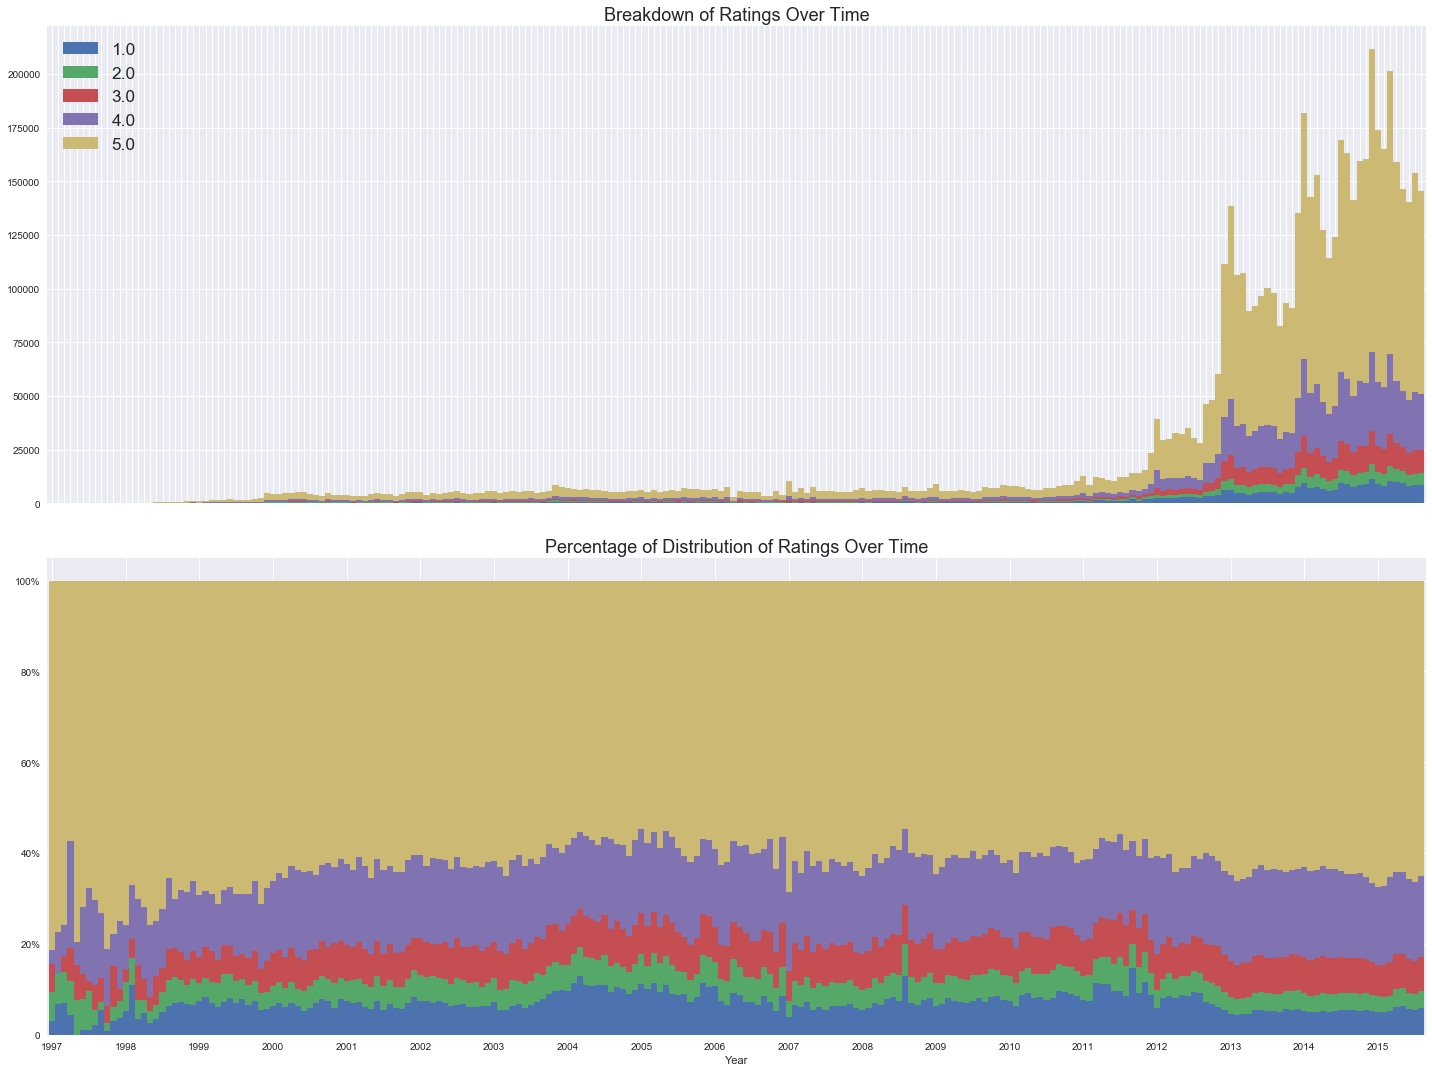

In [14]:
plt.figure(figsize=(20,15))

# Group dataset by month-year and star rating, then pivot to have amount of star ratings over time
group_month = apr.groupby(['month_year', 'star_rating']).count().reset_index()
gm_pivot = group_month.pivot(index='month_year', columns='star_rating', values='customer_id')

# Find last rating date
print('Last recorded rating was on {}'.format(apr.review_date.tail(1).iloc[0]))

# Plot breakdown of total ratings over time
ax1 = plt.subplot(2,1,1)
gm_pivot.iloc[11:, :5].plot.bar(stacked=True, width=1, ax=ax1)
ax1.set_xticklabels(' ')
ax1.set_xlabel(' ')
ax1.legend(fontsize='xx-large')
ax1.set_title('Breakdown of Ratings Over Time', fontsize=18)


# Plot breakdown percentage of total ratings over time
ax2 = plt.subplot(2,1,2)
gm_pivot.iloc[11:, :5].div(gm_pivot.iloc[11:, :5].sum(axis=1), axis=0).plot.bar(stacked=True, width=1, ax=ax2)
ax2.set_yticklabels(['0', '20%', '40%', '60%', '80%', '100%'])
ax2.set_xticklabels(['1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015'])
ax2.legend().remove()
ax2.set_xlabel('Year')
ax2.set_title('Percentage of Distribution of Ratings Over Time', fontsize=18)
plt.xticks(rotation=0)
plt.locator_params(axis='x', nbins=19)

sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

The breakdown of ratings over time changes slightly over time with no clear spike in changes to rating behavior. Although we can see where the spike in reviews occur for each year starting in 2011. As previously observed, these spikes are in January and December of each year.

<a id='conclusion'></a>

------
## Conclusion

In our analysis we were able to look at:
- the distribution of ratings among products and customers.
- determine the most popular products and categories.
- look at the highest rated categories and see what affects rating averages.
- observe how ratings change over time.
- determine the point where the Amazon marketplace exploded in growth.

-----
We discovered the following:

**Distribution of Ratings Among Products and Customers**

Positive ratings occur over 80% of the time, while negative ratings occur roughly 15% of the time and neutral ratings occur 5% of the time.  Roughly 75% of all customers have only reviewed products one time, while roughly 24% have reviewed up to 10 products.  1 customer has reviewed almost 700 products.  Well over 50% of products average a 4.5 or higher rating, while over 90% have a 3.5 or higher rating.

**Most Popular Products and Categories**

Candy Crush is the most popular product reviewed on Amazon which is a mobile app. Every product in the top 10 has over 25,000 reviews with Candy Crush and The Secret Mystery having over 40,000 reviews.  6 of the top 10 categories dominate the marketplace with well over 90% of total ratings and reviews.

**Ratings Among Product Categories**

The range in average ratings from highest to lowest is 0.84, from 3.84 to 4.68.  The categories rated low seem to be categories where customers don't know what they may be receiving, variability of quality among the same type of products, while the categories rated highly seem to have less variability in what one can receive.  The biggest factor that seems to determine a product category's average rating is how many 5 stars, 4 stars and 1 stars that category receives.

**Ratings by Year**

Over time, the average annual product review has stayed between 4.1 and 4.4.  The Amazon marketplace started gaining popularity in 2010 and exploded exponentially from 2011 onwards. 

**Ratings by Month**

December has the most reviews, followed by January. This is likely because of the holiday season and the purchasing and exchange of gifts. January is likely high because money is often a popular gift during the holidays and customers make purchases after the holidays are over. 

-----

As we analyzed these features, we have seen many patterns as they relate to customer reviews. The next step is to use what we have found to begin creating a recommendation engine.

-----


### Potential Recommendation Systems
**Simple Recommender:**

Keyword search based recommender that filters through product title.  May return product matching product title and/or products within the product parent of the matching product title in order to give the user a choice in varying items with similarity.  The product inventory will be filtered by keywords, then ranked by its average rating or weighted smart rating with consideration of popularity (dependent on user’s choice). The top-k products from the list will be returned as the top-k recommendations.

**Content Filtered Recommender:**

Use customer ID and product metadata to build a content based recommender that filters products that are similar to customer preference using past rating information.  Additionally, pairwise similarity scores will be computed for products based on their vectorized feature representation extracted using CountVectorizer or TfidfVectorizer and recommend products or products within a product parent based on rankings of the weighted similarity score (e.g. cosine similarity). The important product metadata to consider include categories, product parent and possibly helpful votes.

**Collaborative Filtering Recommender:**

Use customer/product rating matrix to build a collaborative based filtering recommender. The dataset has a total of 3,653,661 customers, 11,502 products, 5,833,870 reviews. The customer/product matrix is very sparse so matrix factorization using Alternative Least Square (ALS) will be used to complete the matrix and generate recommendations.

**Evaluation Metrics for Algorithm Success:**

Measure prediction accuracy using Root Mean Squared Error (RMSE).

Measure ranking effectiveness using Mean Average Precision (MAP) & Normalized Discounted Cumulative Gain (NDCG).

**Integrated Hybrid Recommendation Engine using Simple, Content & Collaborative Filtering:**

In order to create a hybrid recommendation engine, a few questions will need to be answered:
1. 'Would you like a customized recommendation based on your user history? Provide customer ID.'

If no, the simple recommendation engine will be activated using keyword searches.  If yes, the next question will be asked.
2. 'Would you like to see different items based off of people like you?'

If no, activate content filtered recommendation engine.  If yes, activate collaborative filtering  recommendation engine.

**Optimizing Recommendations:**

Optimize product ranking by weighting the average rating based on total number of ratings, product popularity, and weighting individual product ratings based on recency, etc. The feature is known as 'Intelligent Rating' and can be activated with through preferences instead of using simple average rating.

**Cold Start Problem:**

First time customers will be seen as having no customer ID and user history.  The simple recommender engine will be activated to make recommendations based on keyword searches and popularity.

### Impact
The hybrid recommender system can be beneficial in the case with Amazon, to recommend a diverse selection of items or content to users, as needed, based on several different recommendation methods to customize searches or recommend products that aren't always what the customer is looking for.



<a href='#Table of Contents'>Table of Contents</a>